<a href="https://colab.research.google.com/github/Tatyana-Stoyanova/SVM_banknote/blob/main/SVM_banknote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#classification task -> support vector classifier class (written as SVC in the Scikit-Learn's svm library)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix

Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


Read the csv data set from google drive

In [ ]:
data  = pd.read_csv('/drive/My Drive/bill_authentication.csv')
#Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.
#Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
#For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. 
#Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. 
#Wavelet Transform tool were used to extract features from images.

#https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

In [ ]:
data.shape

(1372, 5)

In [ ]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

Split the data into features and llabels

In [ ]:
x = data.drop('Class', axis=1)
y = data['Class']

Split the data into train features and labels and test features and labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

Create linear Support Vector Machine Classifier

In [ ]:
SVMclassifier = SVC(kernel='linear')

SVC(kernel='linear')

Train SVM classifier

In [ ]:
SVMclassifier.fit(x_train, y_train)

SVC(kernel='linear')

Test SVM classifier on the test data set

In [ ]:
y_pred = SVMclassifier.predict(x_test)

Evaluation of the model

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[153   3]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       156
           1       0.98      0.99      0.98       119

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9854545454545455


In [ ]:
classes = ['fake', 'real']

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


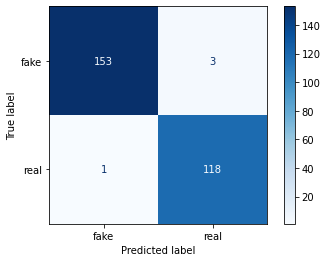

In [ ]:
plot_confusion_matrix(SVMclassifier, x_test, y_test, display_labels=classes, 
                      cmap=plt.cm.Blues)